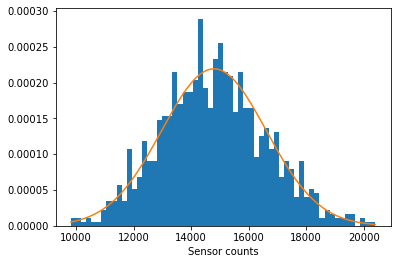

mean = 14795, sigma = 1819, resolution = 0.123011


In [43]:
import os
import math
import optparse
import time
import sys
import numpy as np
from scipy.stats import expon
from scipy.stats import poisson
from scipy import stats  
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


energyDep_hit = 6 #keV
ion_pot = 0.0462 #keV
#GEM_gain = 123
GEM_gain = 400 #330
extraction_eff = 0.33

photons_per_el = 0.07
counts_per_photon = 2

y_dim = 350 #mm
sensor_size = 14.976 #mm
camera_aperture = 0.95


n_ioniz_el_mean=round(energyDep_hit/ion_pot) 
#n_ioniz_el_mean=(energyDep_hit/ion_pot) 

nph_array = np.zeros(1000)
nsec_1GEM_array = np.array([])
n_ioniz_el_array = np.array([])

for run in range(0,1000):
    primary=poisson(n_ioniz_el_mean)           # poisson distribution for primary electrons
    n_ioniz_el=primary.rvs()                   # number of primary electrons
    #n_ioniz_el=n_ioniz_el_mean
    n_ioniz_el_array = np.append(n_ioniz_el_array,n_ioniz_el)
    #print('n ionization electrons = %d'%(n_ioniz_el))
    n_el_oneGEM=0                              # number of secondary electrons
    gain2=expon(loc=0,scale=GEM_gain)  # exponential distribution for the GAIN in the first GEM foil
    for k in range(0,n_ioniz_el):
        #nsec_mean = gain2.rvs()*extraction_eff                   # number of secondary electrons in the first GEM multiplication for each ionization electron
        #nsec_pdf = poisson(nsec_mean)
        #nsec=nsec_pdf.rvs()
        nsec = gain2.rvs()*extraction_eff
        n_el_oneGEM += nsec
        nsec_1GEM_array = np.append(nsec_1GEM_array,nsec)

        #print ('--   loop on ioniz el, k= %d - nsec= %d - nel_onegem= %d'%(k,nsec,n_el_oneGEM))

    #n_tot_el=n_el_oneGEM*pow(GEM_gain,2)  # total number of secondary electrons considering the gain in the 2nd and 3rd GEM foils
    n_tot_el=n_el_oneGEM*GEM_gain*GEM_gain*extraction_eff #do not use extraction_eff for last gem
    #print('--total number of electron = %d'%(n_tot_el))
    nmean_tot_ph=n_tot_el*photons_per_el       # mean total number of photons
    photons=poisson(nmean_tot_ph)                    # poisson distribution for photons
    n_tot_ph=photons.rvs()                   # number of total photons
    #n_tot_ph=nmean_tot_ph
    
    demag=y_dim/sensor_size
    a=camera_aperture
    omega=1./math.pow((4*(demag+1)*a),2)   # solid angle ratio
    #print(omega)
    n_photons=n_tot_ph*omega               # number of photons in the sensor  
    nph = n_photons*counts_per_photon
    nph_array[run] = nph
    
#print(nph_array)
    
#fig, ax = plt.subplots()
num_bins = 60

# the histogram of the data
#n, bins, patches = ax.hist(nph_array, num_bins, density=True)
plt.hist(nph_array, num_bins, density=True)

# best fit of data
m, s = stats.norm.fit(nph_array) # get mean and standard deviation  
xmin, xmax = min(nph_array), max(nph_array)  
lnspc = np.linspace(xmin, xmax, len(nph_array))
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it


# Tweak spacing to prevent clipping of ylabel
#fig.tight_layout()

plt.xlabel('Sensor counts')
plt.ylabel('')
plt.show()

print("mean = %d, sigma = %d, resolution = %f"%(m,s,s/m))


(0.0, 131.71574894316035)


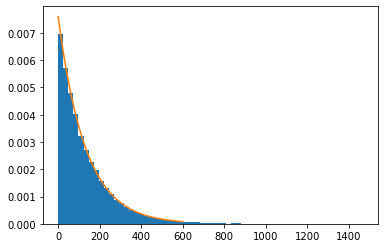

In [44]:
#print(nsec_1GEM_array)
plt.hist(nsec_1GEM_array,num_bins, density=True)
#plt.xlim(xmin=0, xmax = 1000)
#plt.ylim(ymin=0, ymax = 10000)
EXP = expon.fit(nsec_1GEM_array, floc=0)
print(EXP)
xmin, xmax = min(nsec_1GEM_array), max(nsec_1GEM_array)
lnspc2 = np.linspace(0, 600, 100)
#print(lnspc2)
pdf_exp = stats.expon.pdf(lnspc2,*EXP)
plt.plot(lnspc2, pdf_exp, label="exp")

plt.show()